In [2]:
import numpy as np
import pandas as pd
import os
import gc
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [25]:
train = pd.read_csv('./data/train.csv')
train_text = train.full_log

In [36]:
char = set()

for j in train_text:
    for i in range(len(j)):
        char.update(j[i])

char

{'\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '°',
 'ã',
 'å',
 'ð',
 'ó',
 'õ',
 '÷',
 'û',
 'ü',
 'ý',
 'ÿ',
 'ġ',
 'Ű',
 'ŷ',
 'Ÿ',
 'ź',
 'Ʈ',
 'ƺ',
 'ǥ',
 'Ǫ',
 'Ǵ',
 'ǻ',
 'Ǿ',
 'ǿ',
 'ȣ',
 'ȭ',
 'Ȯ',
 'Ȱ',
 'ȿ',
 'ʰ',
 'ʽ',
 '˸',
 '˾',
 '̰',
 '̸',
 '̹',
 'α',
 'ε',
 'ι',
 'μ',
 'ϴ',
 'ϵ',
 'Ͻ',
 'и',
 'ӽ',
 'Դ',
 'մ',
 'ִ',
 'ֽ',
 'ش',
 'ؼ',
 'ؽ',
 'ٽ',
 'ٿ',
 'ڵ',
 'ڼ',
 '۵',
 '۾',
 'ۿ',
 '߰',
 'ߴ',
 '“',
 '”',
 '가',
 '간',
 '갈',
 '값',
 '객',
 '거',
 '결',
 '경',
 '

## 전처리

### 공백, 대소문자 처리

In [392]:
train_text = train_text.str.strip() # 앞뒤 공백 제거

In [393]:
train_text = train_text.str.lower() # 모두 소문자로

### ip 주소
- 공인IP 주소
     - 인터넷 사용자의 로컬 네트워크를 식별하기 위해 ISP(인터넷 서비스 공급자)가 제공하는 IP 주소이다. 공용 IP 주소라고도 불리며 외부에 공개되어 있는 IP 주소이다.
    - 공인 IP는 전세계에서 유일한 IP 주소를 갖는다.
    - 공인 IP 주소가 외부에 공개되어 있기에 인터넷에 연결된 다른 PC로부터의 접근이 가능하다. 따라서 공인 IP 주소를 사용하는 경우에는 방화벽 등의 보안 프로그램을 설치할 필요가 있다.
- 사설IP 주소
    - 일반 가정이나 회사 내 등에 할당된 네트워크의 IP 주소이며, 로컬 IP, 가상 IP라고도 한다. 
    - IPv4의 주소부족으로 인해 서브넷팅된 IP이기 때문에 라우터에 의해 로컬 네트워크상의 PC 나 장치에 할당된다.
    - 다음 3가지 주소대역으로 고정된다.
        - Class A : 10.0.0.0 ~ 10.255.255.255
            - 10\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}
        - Class B : 172.16.0.0 ~ 172.31.255.255
            - 172\.[1-3]{1}[0-9]{1}\.[0-9]{1,3}\.[0-9]{1,3}
        - Class C : 192.168.0.0 ~ 192.168.255.255
            - 192\.168\.[0-9]{1,3}\.[0-9]{1,3}

In [388]:
train['ip'] = train.full_log.apply(lambda x : re.findall(r'[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}', x)) # ip 주소 마스킹
ips=[]
for i in train.ip:
    if len(i)>0:
        for j in i:
            ips.append(j)

In [390]:
set(ips)

{'0.0.0.0',
 '0.118.131.4',
 '1.13.0.183',
 '121.153.191.130',
 '127.0.0.1',
 '15.64.80.0',
 '15.65.78.0',
 '15.67.99.0',
 '16.0.0.0',
 '167.248.133.19',
 '172.176.213.35',
 '185.66.130.25',
 '192.168.0.0',
 '192.168.0.100',
 '192.168.0.11',
 '192.168.0.14',
 '192.168.0.157',
 '192.168.0.160',
 '192.168.0.168',
 '192.168.0.169',
 '192.168.0.18',
 '192.168.0.181',
 '192.168.0.184',
 '192.168.0.186',
 '192.168.0.187',
 '192.168.0.189',
 '192.168.0.190',
 '192.168.0.193',
 '192.168.0.195',
 '192.168.0.197',
 '192.168.0.202',
 '192.168.0.218',
 '192.168.0.224',
 '192.168.0.229',
 '192.168.0.233',
 '192.168.0.243',
 '192.168.0.42',
 '192.168.0.46',
 '192.168.122.1',
 '2.0.0.0',
 '211.253.243.66',
 '211.253.243.71',
 '211.253.243.72',
 '211.253.243.76',
 '221.143.42.118',
 '35.184.222.44',
 '35.213.176.172',
 '4.0.0.0',
 '44.222.184.35',
 '5.10.1.3',
 '5.2.1.2',
 '5.4.1.1',
 '5.5.2.2',
 '5.6.2.1',
 '61.41.101.142',
 '7.3.0.117',
 '78.128.113.18',
 '8.8.8.8',
 '88.214.24.92',
 '89.248.167.131

### 마스킹

In [394]:
#replace

# 줄바꿈 제거
train_text = train_text.apply(lambda x: re.sub(r'(\\n)',' ',x))

# 특수문자 앞뒤 공백
train_text = train_text.apply(lambda x: re.sub(r' ?(\W) ?', r' \1 ', x))

# 공백을 한 칸 띄어쓰기로
train_text = train_text.apply(lambda x: re.sub(r'\s+',' ',x))

# audit id
train_text = train_text.apply(lambda x : re.sub(r'(?<=audit \( \d{10} \. \d{3} : )\d{5,6}', '<id>', x))

# audit time
train_text = train_text.apply(lambda x : re.sub(r'(?<=audit \( )\d{10} \. \d{3}', '<time>', x))

# 특수문자 포함된 숫자 마스킹
# privateip
train_text = train_text.apply(lambda x: re.sub(r'10 \. [0-9]{1,3} \. [0-9]{1,3} \. [0-9]{1,3}', '<privateip>', x)) # ip 주소 마스킹
train_text = train_text.apply(lambda x: re.sub(r'172 \. [1-3]{1}[0-9]{1} \. [0-9]{1,3} \. [0-9]{1,3}', '<privateip>', x)) # ip 주소 마스킹
train_text = train_text.apply(lambda x: re.sub(r'192 \. 168 \. [0-9]{1,3} \. [0-9]{1,3}', '<privateip>', x)) # ip 주소 마스킹

# publicip
train_text = train_text.apply(lambda x: re.sub(r'[0-9]{1,3} \. [0-9]{1,3} \. [0-9]{1,3} \. [0-9]{1,3}', '<publicip>', x)) # ip 주소 마스킹

# time
train_text = train_text.apply(lambda x: re.sub(r'(?<=\D)[0-9]{1,2} \: [0-9]{1,2}( \: [0-9]{1,2})?', '<time>', x)) # 시간 마스킹
train_text = train_text.apply(lambda x: re.sub(r'(?<=port = )[0-9]+', '<port>', x)) # port 번호 마스킹
train_text = train_text.apply(lambda x: re.sub(r'(?<=port : )[0-9]+', '<port>', x)) # port 번호 마스킹
train_text = train_text.apply(lambda x: re.sub(r'(?<=port )[0-9]+', '<port>', x)) # port 번호 마스킹

train_text = train_text.apply(lambda x: re.sub('(?<=id " : )[0-9]+', '<id>', x)) # id 마스킹
train_text = train_text.apply(lambda x: re.sub('(?<=id = )[0-9]+', '<id>', x)) # id 마스킹

train_text = train_text.apply(lambda x: re.sub('((?<=(sshd \[ ))([0-9]+)(?=(\ ] )))|((?<=pid " : )[0-9]+)', '<pid>', x)) # 프로세스id 마스킹
train_text = train_text.apply(lambda x: re.sub('(?<=pid = )[0-9]+', '<pid>', x)) # 프로세스id 마스킹


In [395]:
# 숫자 마스킹'

def num_masking(text):
    text = re.sub('((jan|feb|mar|apr|may|jun|jul|aug|dec|oct|sep|nov|mar) [0-9]{1,2})|((19|20)[0-9]{2} - (0|1)[0-9]{1} - [0-3][0-9]{1})', '<date>', text) # 날짜 
    text = re.sub(r'(?=\S*\d)(?=\S*[a-z])[a-z0-9]*','<serial>', text) # 최소 하나의 숫자와 최소 하나의 알파벳을 포함하는 것
    text = re.sub('\d+', '<num>', text) # 모든 숫자 마스킹
    return text

train_text = train_text.apply(lambda x: num_masking(x))

# >문자< or >문자 일 때 공백처리
train_text = train_text.apply(lambda x : re.sub('>?\S<', '> <', x))
train_text = train_text.apply(lambda x : re.sub('>\S', '> ', x))


# 언더바
train_text = train_text.apply(lambda x : re.sub('_', ' ', x))


# 공백을 한 칸 띄어쓰기로
train_text = train_text.apply(lambda x: re.sub(r'\s+',' ',x))

- 9200은 엘라스틱 서치의 기본 포트다

# 띄어쓰기 토크나이징

In [445]:
%%time
word_set = set()
for x in train_text:
    word_set.update(x.split(' '))

len(word_set) # 띄어쓰기로 토크나이징했을 때 단어 개수

CPU times: user 2.3 s, sys: 44.9 ms, total: 2.34 s
Wall time: 2.34 s


{'',
 'cacertdir',
 'wangzhikai',
 'agent',
 'sys',
 'mcheck',
 'mouse',
 'enforcing',
 'ifstat',
 'setrlimit',
 'dnsdomainname',
 'logfile',
 'malicious',
 'gitrun',
 'screenshot',
 'smbcquotas',
 'vdoformat',
 'ioconf',
 'teredo',
 'specialpublications',
 'vfs',
 'compose',
 'freqset',
 'dyninst',
 'infiniband',
 'geqn',
 'appuser',
 'falure',
 'md',
 'conntrack',
 'umbus',
 'afs',
 'lchage',
 'sysstat',
 'xfrm',
 'percentage',
 'pure',
 'syn',
 'unqeual',
 'solaris',
 'station',
 'mklayout',
 'typefind',
 'natpool',
 'deflate',
 'zhaokai',
 'offline',
 'numad',
 'pdfinfo',
 'fgrep',
 'isosize',
 'objrepos',
 'seusers',
 'vendorspecificieproviders',
 'keep',
 'icmp',
 'they',
 'auth',
 'detected',
 'atq',
 'ntsysv',
 'spid',
 'openldap',
 'openvas',
 'mdadm',
 'problems',
 'workpads',
 'direct',
 'tickers',
 'selftests',
 'internet',
 'rf',
 'contextmenuhandlers',
 'wlansvc',
 'bn',
 'sshpw',
 'rd',
 'iprdbg',
 'wpa',
 'pvremove',
 'pflags',
 'busy',
 'yvrnincb',
 'conn',
 'tga',
 'd

sv260 같은 경우는 어떻게 고려해야 할지?

In [451]:
train['spaced'] = train_text
train

id  level                                           full_log url  \
0            0      0  Sep 24 10:02:22 localhost kibana: {"type":"err...  []   
1            1      0  Feb  8 16:21:00 localhost logstash: [2021-02-0...  []   
2            2      0  Jan 13 01:50:40 localhost kibana: {"type":"err...  []   
3            3      0  Jan  4 10:18:31 localhost kibana: {"type":"err...  []   
4            4      1  type=SYSCALL msg=audit(1603094402.016:52981): ...  []   
...        ...    ...                                                ...  ..   
472967  472967      0  Feb 28 10:10:06 localhost logstash: 7738   error:  []   
472968  472968      1  type=SYSCALL msg=audit(1611890993.458:321827):...  []   
472969  472969      0  Oct 12 02:20:29 localhost kibana: {"type":"log...  []   
472970  472970      0  Jan 15 09:02:43 localhost kibana: {"type":"err...  []   
472971  472971      0  Oct 12 04:27:47 localhost kibana: {"type":"err...  []   

                                                    mixed  \
0       [, , type, , , , error, , , , , timestamp, , ,...   
1       [, reason, , , , , , wazuh, , alerts, , audit,...   
2       [, , type, , , , error, , , , , timestamp, , ,...   
3       [, , type, , , , error, , , , , timestamp, , ,...   
4       [msg, , audit, arch, , c000003e, syscall, exit...   
...                                                   ...   
472967                                                 []   
472968  [msg, , audit, arch, , c000003e, syscall, exit...   
472969  [, , type, , , , log, , , , , timestamp, , , ,...   
472970  [, , type, , , , error, , , , , timestamp, , ,...   
472971  [, , type, , , , error, , , , , timestamp, , ,...   

                                                   spaced  
0       <date> <time> localhost kibana : { " type " : ...  
1       <date> <time> localhost logstash : [ <date> <t...  
2       <date> <time> localhost kibana : { " type " : ...  
3       <date> <time> localhost kibana : { " type " : ...  
4       type = syscall msg = audit ( <time> : <id> ) :...  
...                                                   ...  
472967  <date> <time> localhost logstash : <num> error :   
472968  type = syscall msg = audit ( <time> : <id> ) :...  
472969  <date> <time> localhost kibana : { " type " : ...  
472970  <date> <time> localhost kibana : { " type " : ...  
472971  <date> <time> localhost kibana : { " type " : ...  

[472972 rows x 6 columns]

In [452]:
one_sentences = []

for level in train['level'].unique(): # level 0~6
    temp = train[train['level'] == level]['spaced'] # 해당 level에 해당되는 spaced 데이터들
    one_sentence = ' '.join(list(temp))
    one_sentences.append(one_sentence)
    
df_one_sentences = pd.DataFrame({'level':train['level'].unique(), 'log':one_sentences})

In [453]:
df_one_sentences # level 별 띄어쓰기 토큰

level                                                log
0      0  <date> <time> localhost kibana : { " type " : ...
1      1  type = syscall msg = audit ( <time> : <id> ) :...
2      3  <date> <time> localhost systemd : unit esild -...
3      5  ossec : output : ' netstat listening ports ' :...
4      2  the average number of logs between <time> and ...
5      4  <date> <time> localhost sshd [ <pid> ] : did n...
6      6  <date> <time> localhost sshd [ <pid> ] : bad p...

# WordCloud

In [133]:
# pip install wordcloud

In [129]:
import matplotlib as mpl
from wordcloud import WordCloud
import collections
from matplotlib import font_manager, rc

font_path = './data/D2Coding.ttf'
font_name = font_manager.FontProperties(
    fname=font_path).get_name()

In [132]:
# rc('font', family=font_name)
# mpl.font_manager._rebuild()

level :  0


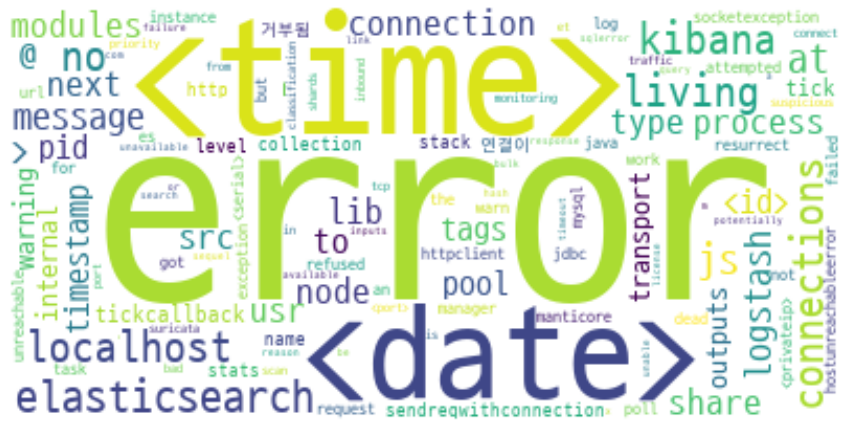

level :  1


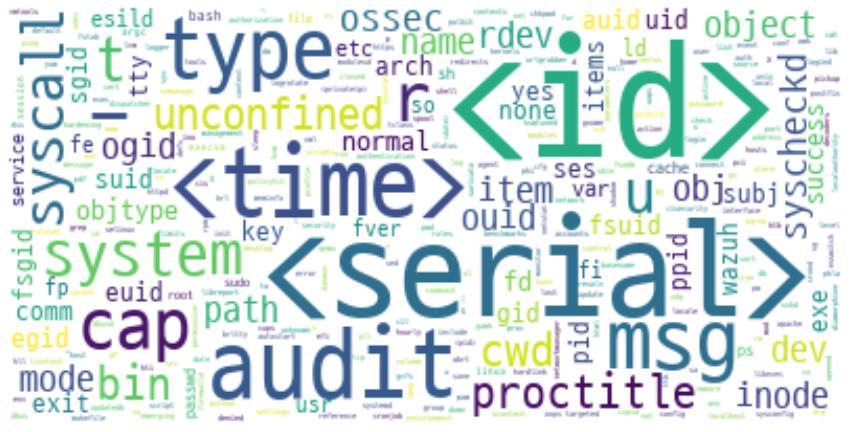

level :  2


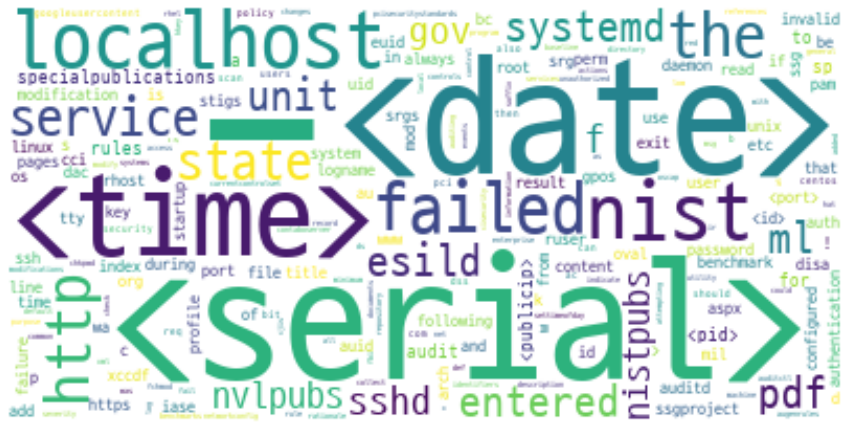

level :  3


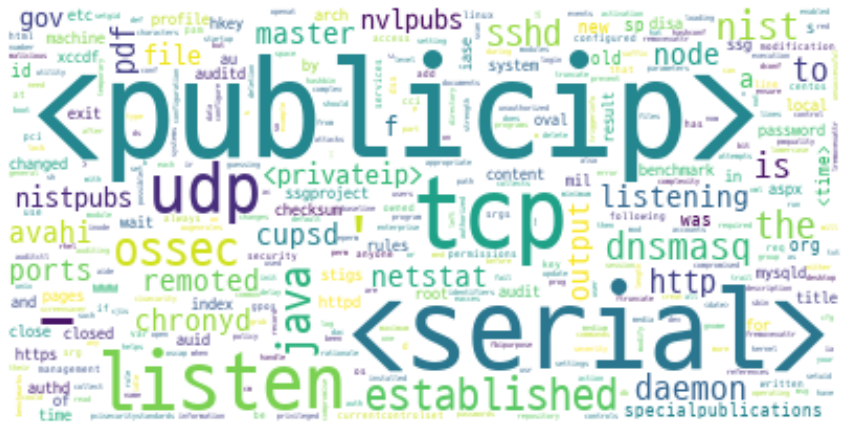

level :  4


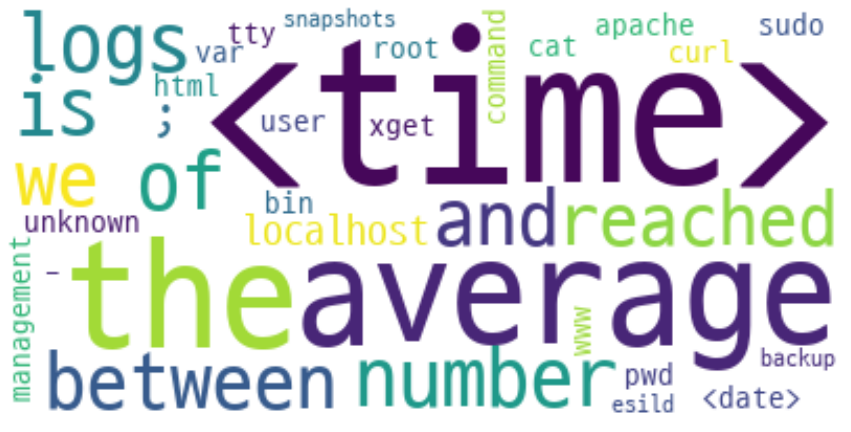

level :  5


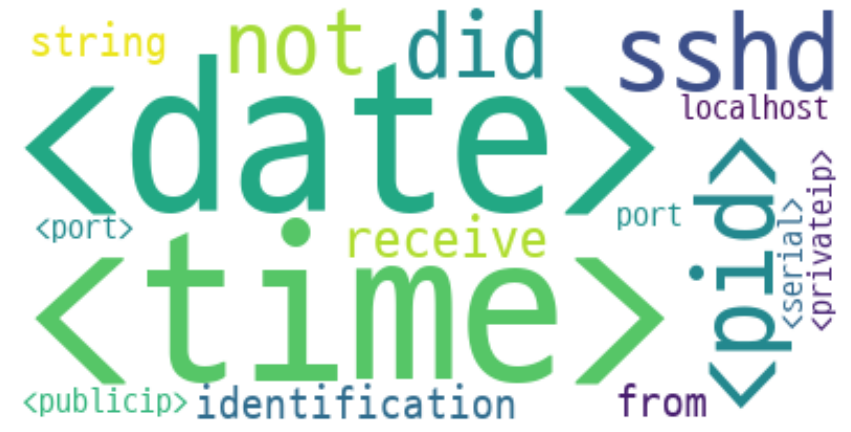

level :  6


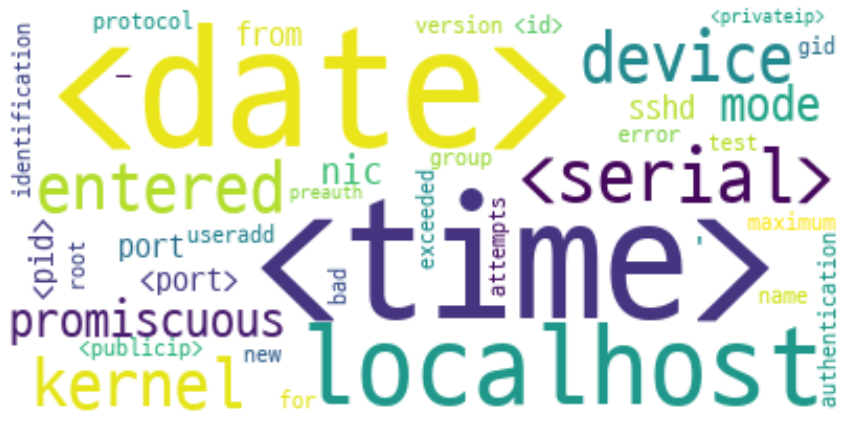

In [491]:
stopwords = [':', '[', ']', '"', ',', '.', '*', '/', '\\', '{', '}', '=', '(', ')', '<num>']

for i in range(7):
    print('level : ', i)
    level_index = i
    words = df_one_sentences.log[level_index].split(' ')
    worddict = collections.Counter(words)
    
    # stopwords not working
    for key in stopwords:
        del worddict[key]

    wordcloud_img = WordCloud(
            background_color='white',
            max_words=2000,
            font_path=font_path,
            stopwords=stopwords).generate_from_frequencies(worddict)

    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud_img, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Word2Vec

In [212]:
from gensim.models import Word2Vec
import warnings

warnings.simplefilter("ignore")

In [477]:
cleaned_tokens = []
for sentence in df_one_sentences.log:
    token = sentence.split(' ')
    cleaned_tokens.append(token)

    ####
# for j in cleaned_tokens:
#     if len(j) > 20:
#         cleaned_tokens.remove(j)
    ####
    
model = Word2Vec(cleaned_tokens, vector_size=200,
                          window=4, min_count=5,
                          workers=4, sg=1)

In [283]:
# model.wv['error']

In [478]:
vocab = list(model.wv.key_to_index.keys())

X = model.wv[vocab]
df=pd.DataFrame(X, index=vocab)
print(df.shape)
df.head()

(4792, 200)


0         1         2         3         4         5         6    \
"      0.067743  0.009316  0.038368  0.537422 -0.221713 -0.027008  0.250755   
=      0.096504  0.146610 -0.066100  0.113186  0.349551  0.165944 -0.267106   
:     -0.159743 -0.010558 -0.396892  0.294059  0.039338  0.145952  0.132861   
/      0.098756 -0.012552 -0.152202  0.188504 -0.053996  0.165127  0.232937   
<num> -0.286621  0.060814 -0.139183  0.399561  0.080814  0.065038  0.293886   

            7         8         9    ...       190       191       192  \
"     -0.038148 -0.295446  0.119835  ...  0.109168  0.340680  0.057617   
=     -0.046336 -0.172630  0.060809  ...  0.185975  0.020046 -0.543598   
:      0.088131 -0.202796  0.346083  ...  0.415617  0.387012 -0.271455   
/     -0.070499 -0.156107  0.109948  ...  0.099652  0.168263 -0.511963   
<num> -0.029478 -0.152603  0.075091  ...  0.145720  0.353561 -0.250531   

            193       194       195       196       197       198       199  
"     -0.204855  0.184077 -0.022162  0.126279 -0.136216 -0.405359  0.107822  
=      0.036845  0.470265  0.224289  0.633419 -0.712511 -0.185759 -0.364572  
:     -0.454817  0.221298  0.237260 -0.008758 -0.141046  0.184054  0.032009  
/      0.086131 -0.150263 -0.054572  0.091772  0.079727  0.024850  0.345699  
<num>  0.198832  0.329868  0.007157  0.060345 -0.006443  0.199938  0.067496  

[5 rows x 200 columns]

In [479]:
#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

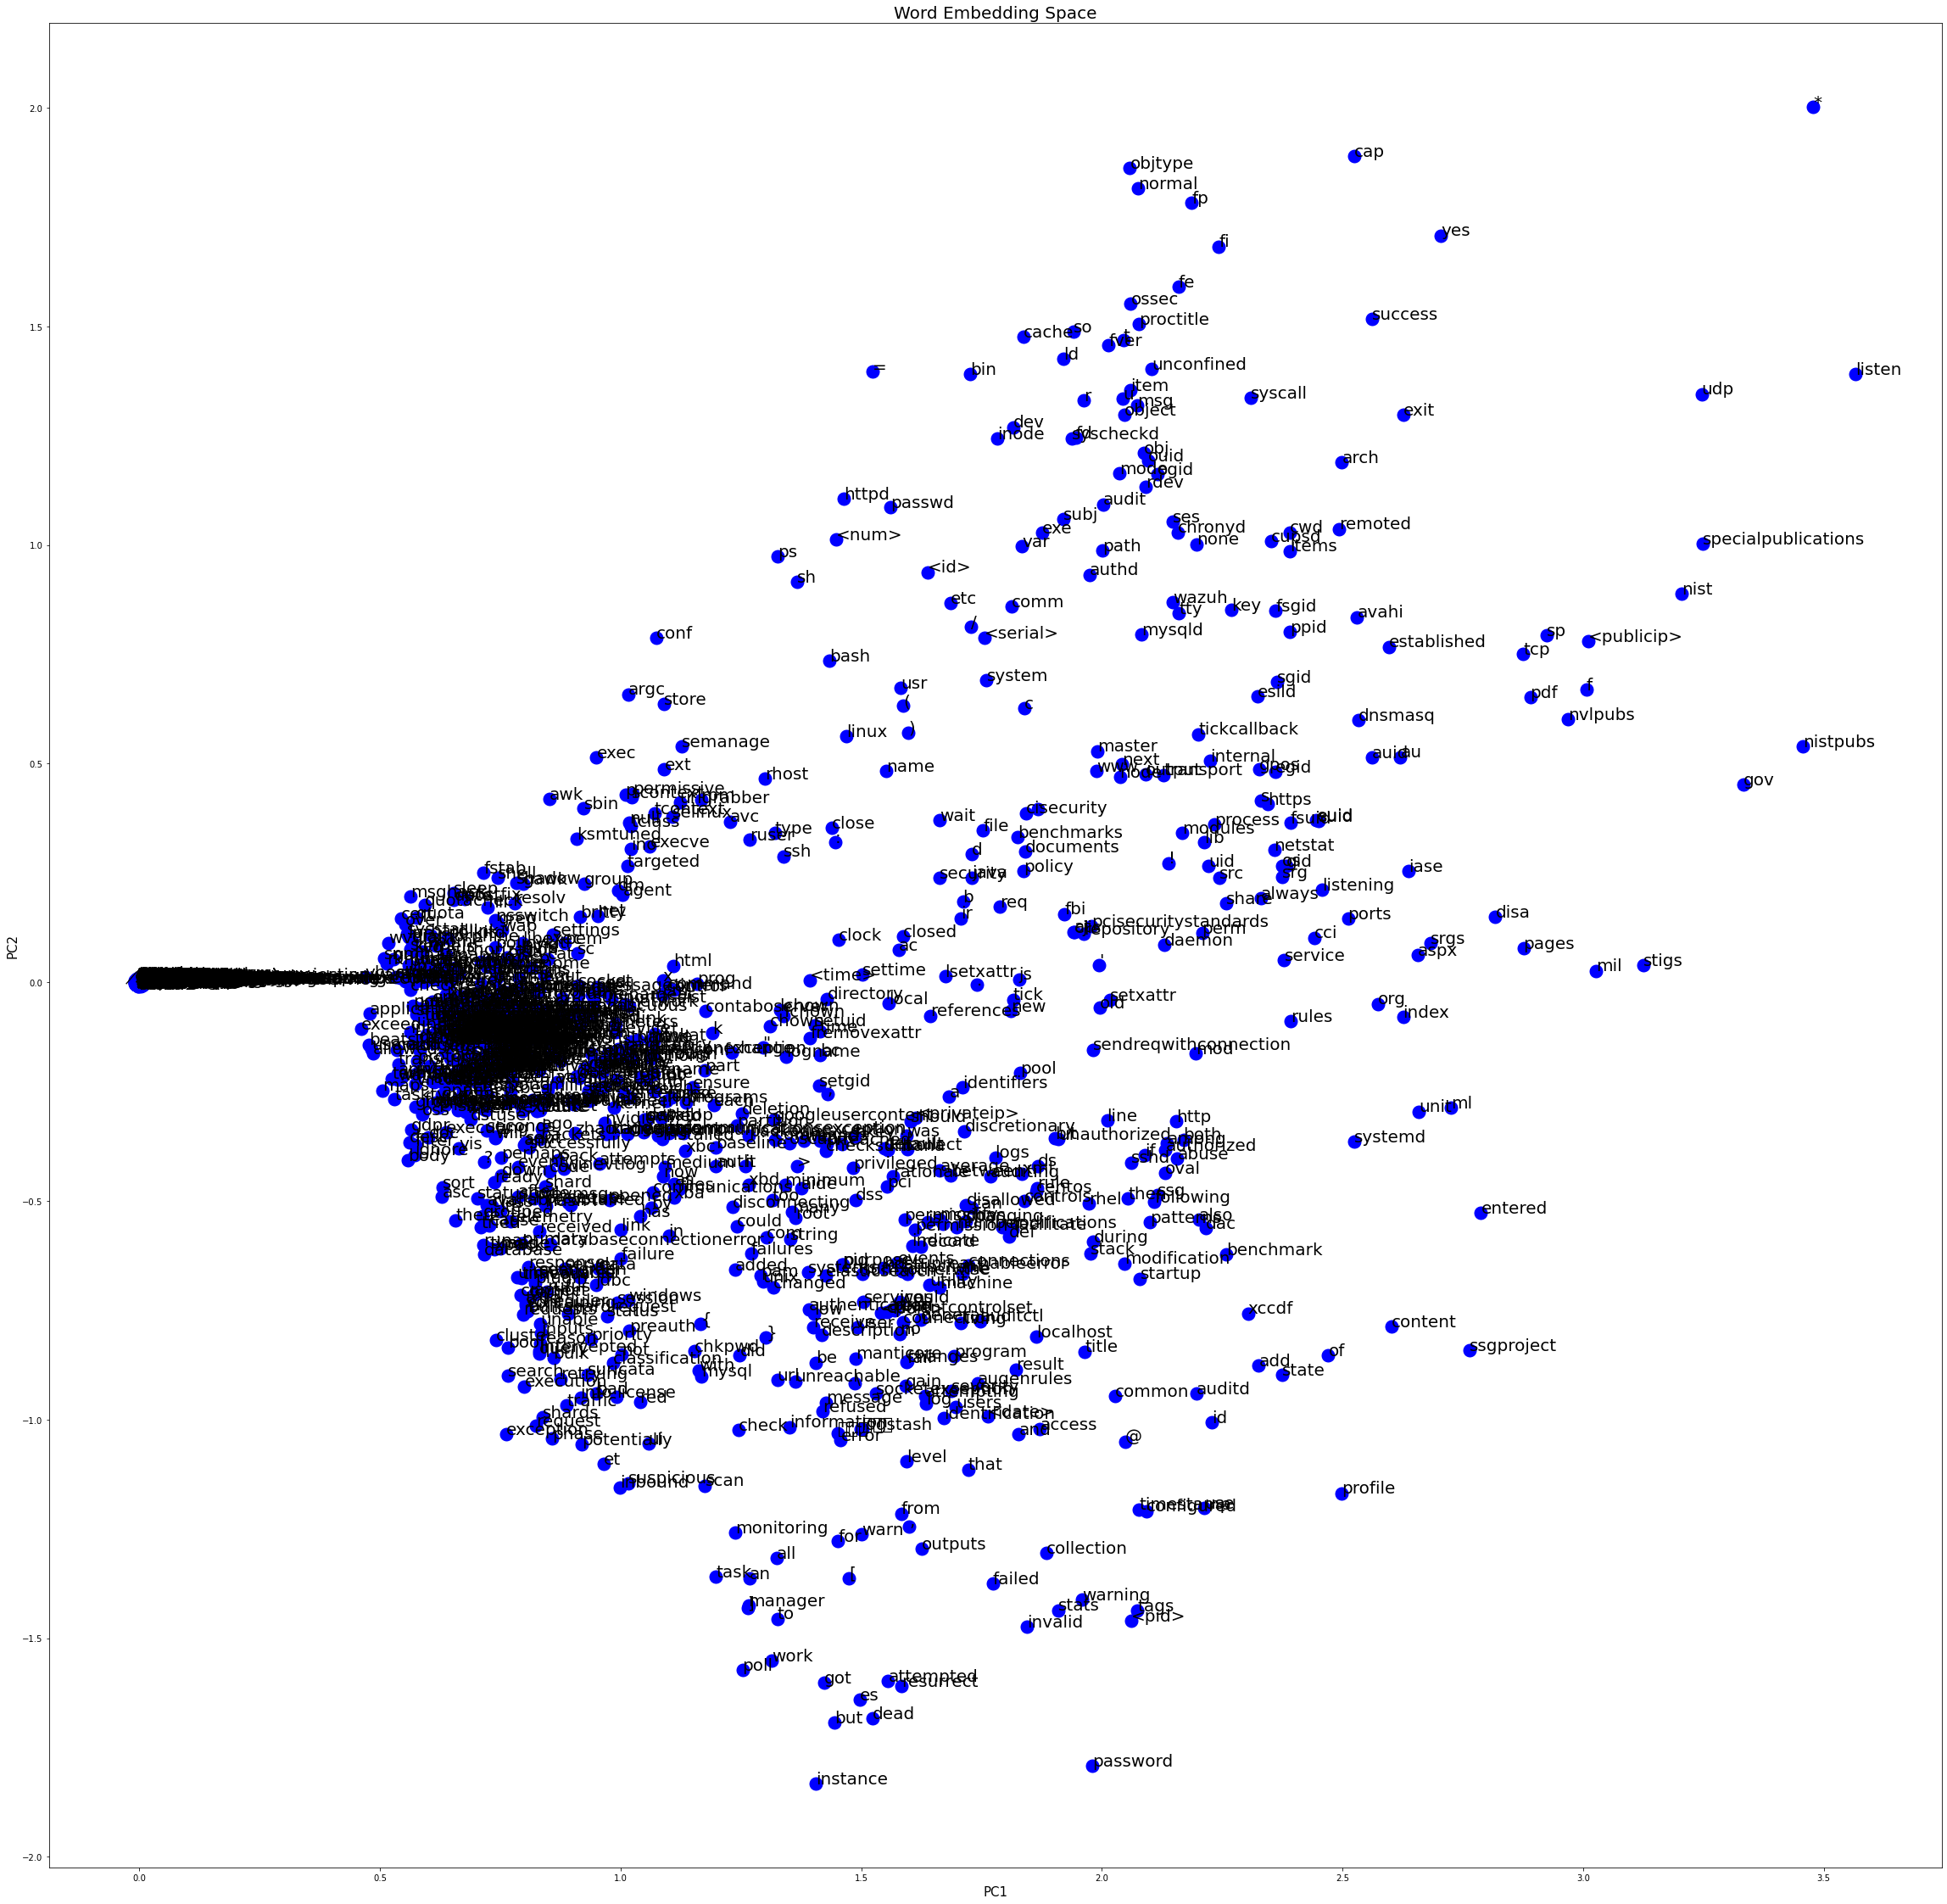

In [480]:
plt.figure(figsize=(40,40))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab = model.wv
for word, i in model.wv.key_to_index.items():
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]), fontsize=20)
# plt.savefig('foo.png')

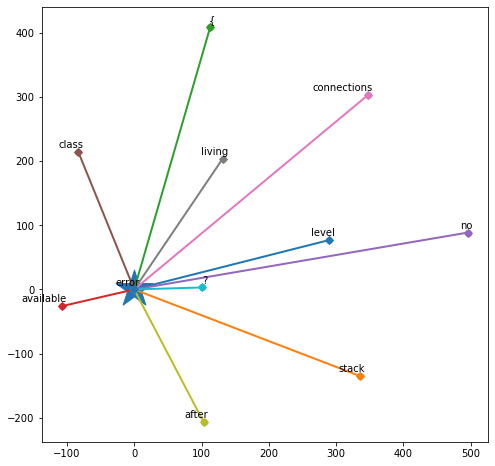

In [482]:
from sklearn.manifold import TSNE


key_word = 'error'
sim_word = model.wv.most_similar(key_word, topn=10)

vectors = []
labels = []

for label, _ in sim_word:
    labels.append(label)
    vectors.append(model.wv[label])

df_vectors = pd.DataFrame(vectors)

tsne_model = TSNE(perplexity=40, n_components=2,
                  init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(df_vectors)
df_xy = pd.DataFrame({'words':labels, 'x':new_values[:,0],
                     'y':new_values[:,1]})

df_xy.loc[df_xy.shape[0]] = (key_word, 0, 0)
plt.figure(figsize=(8,8))
plt.scatter(0,0,s=1500, marker='*') #0,0좌표기준으로 별표시
for i in range(len(df_xy.x)):
    a = df_xy.loc[[i, 10],:] #2개 인덱싱, 선그림 작업
    plt.plot(a.x, a.y, '-D', linewidth=2) #점찍고
    plt.scatter(df_xy.x[i], df_xy.y[i]) #단어갔다쓰기
    plt.annotate(df_xy.words[i], xytext=(5,2),
                 xy=(df_xy.x[i], df_xy.y[i]),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()

# 위험도 0, 1

(1431, 200)


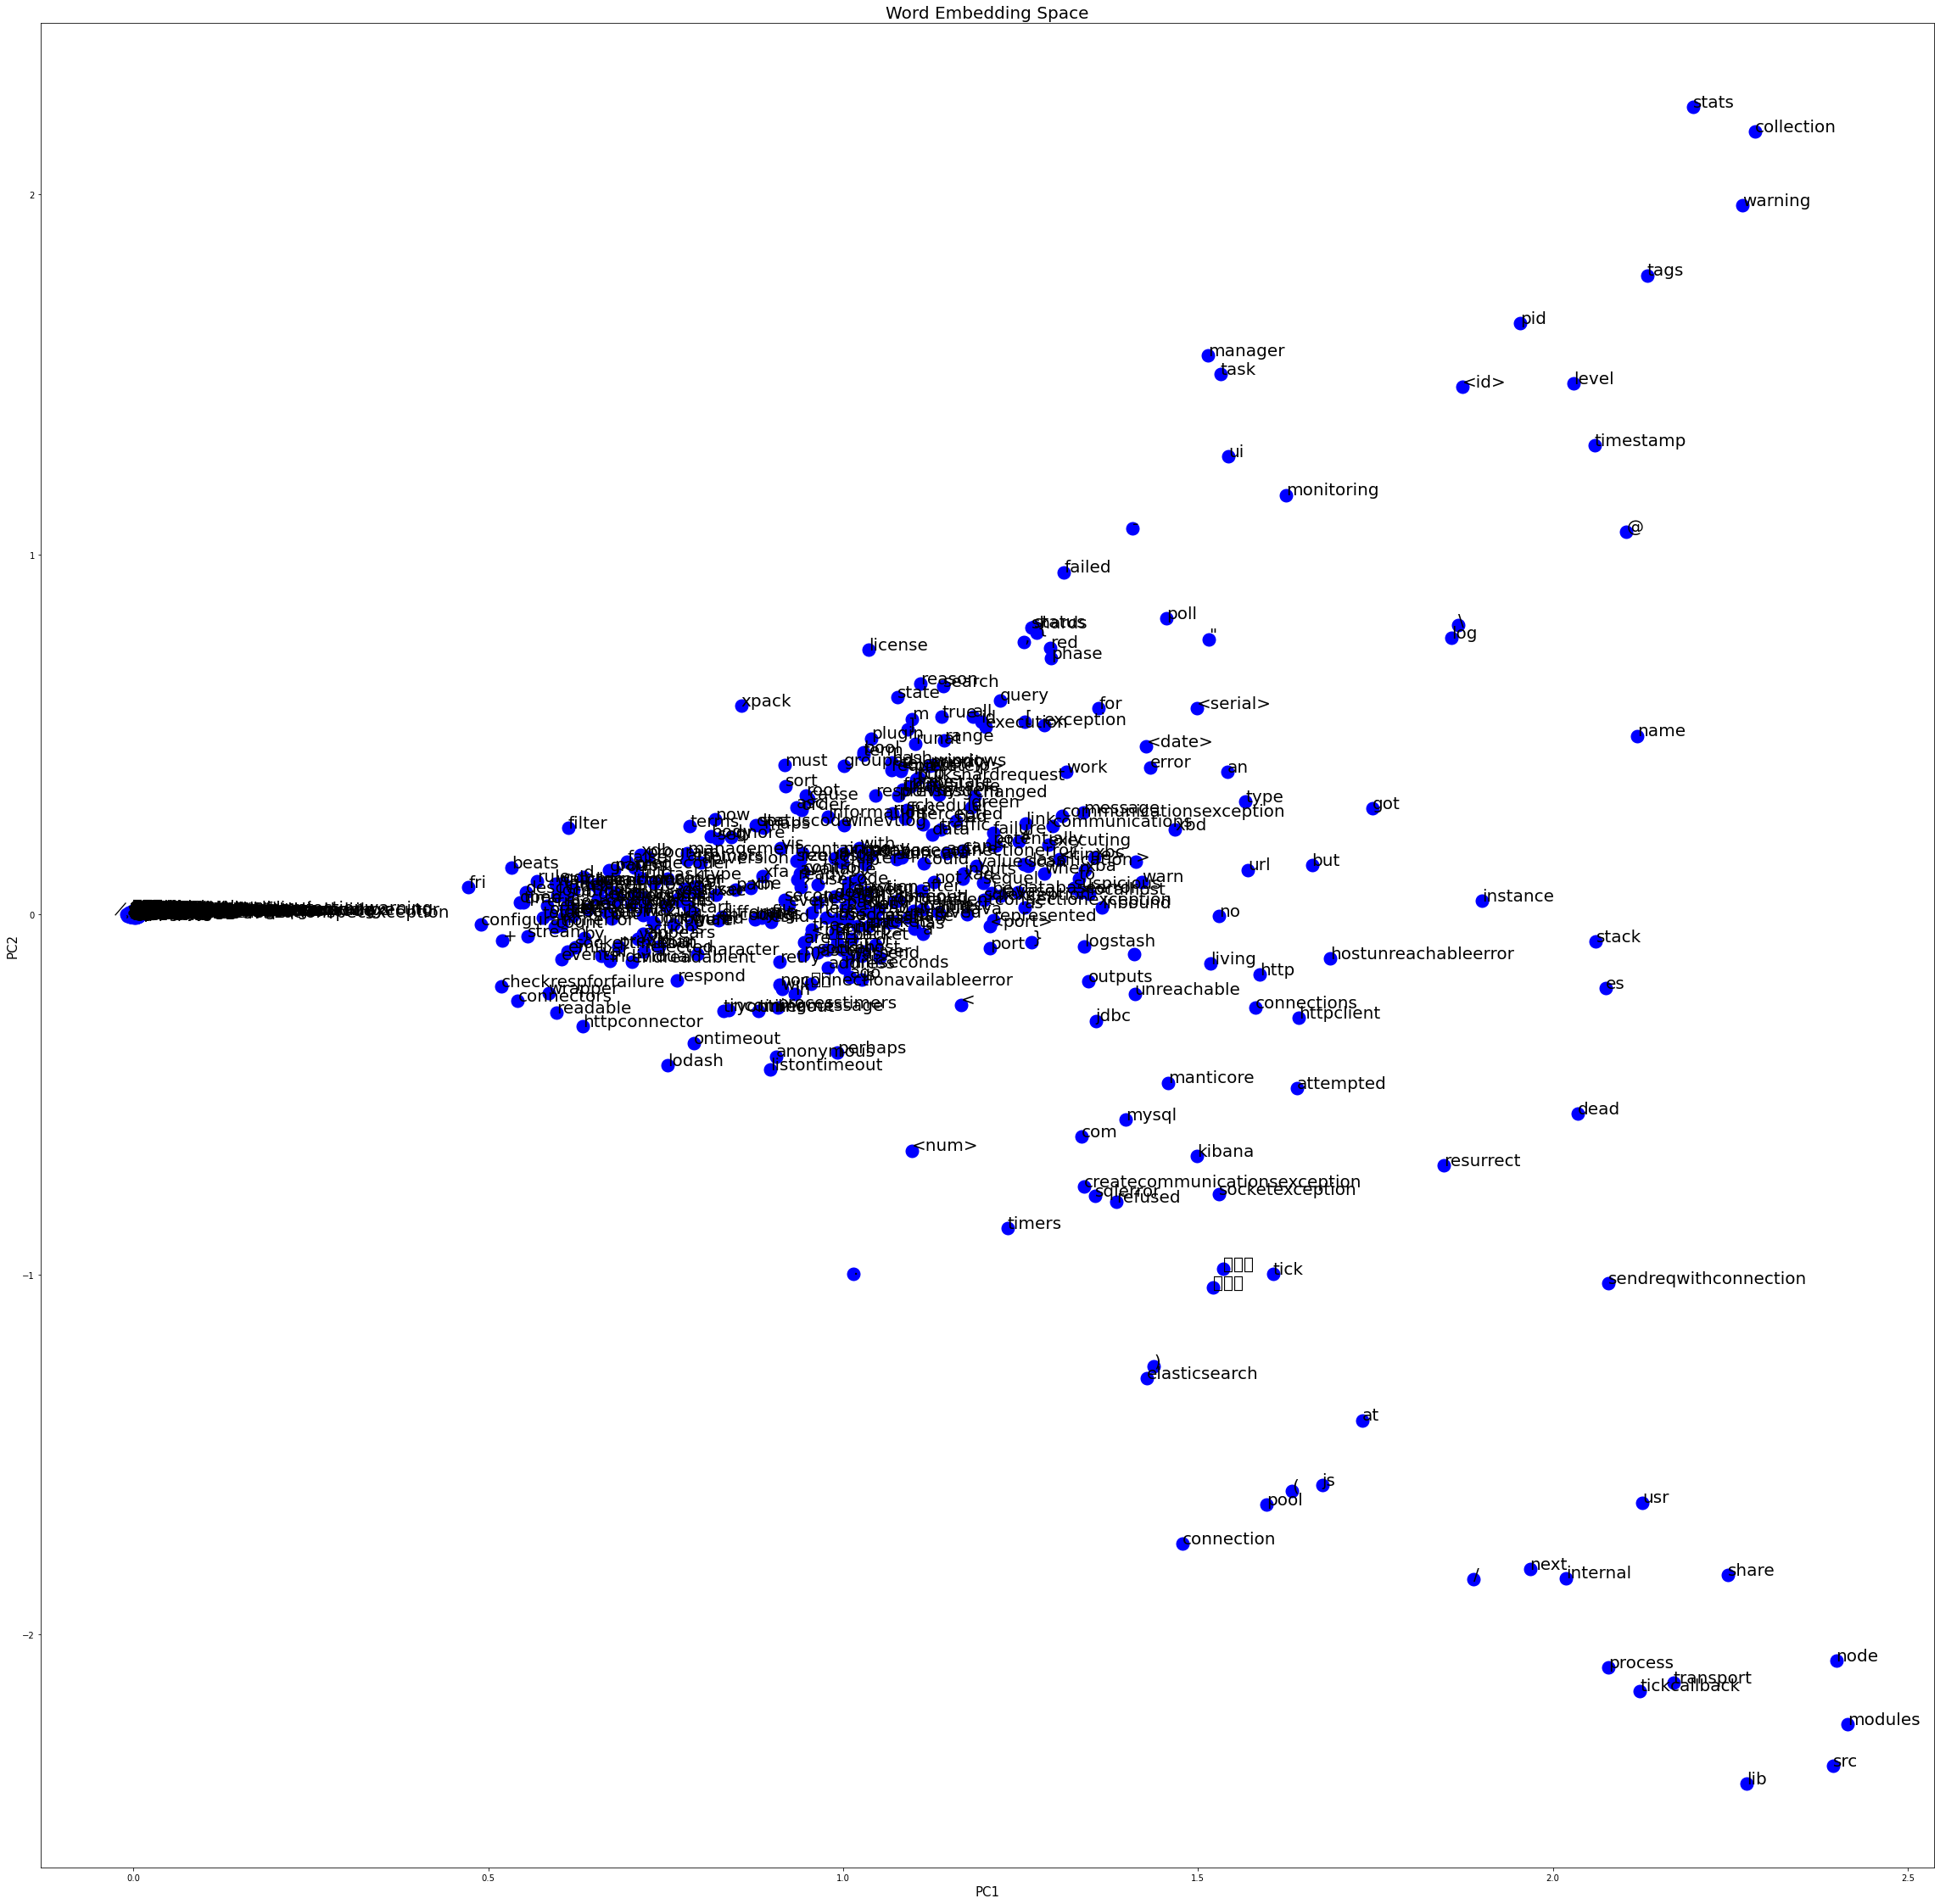

In [485]:
cleaned_tokens = []

token = df_one_sentences.log.loc[0].split(' ')
cleaned_tokens.append(token)
    
model = Word2Vec(cleaned_tokens, vector_size=200,
                          window=4, min_count=5,
                          workers=4, sg=1)


vocab = list(model.wv.key_to_index.keys())
X = model.wv[vocab]
df=pd.DataFrame(X, index=vocab)
print(df.shape)
df.head()

#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

plt.figure(figsize=(40,40))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab = model.wv
for word, i in model.wv.key_to_index.items():
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]), fontsize=20)
# plt.savefig('foo.png')

(3324, 200)


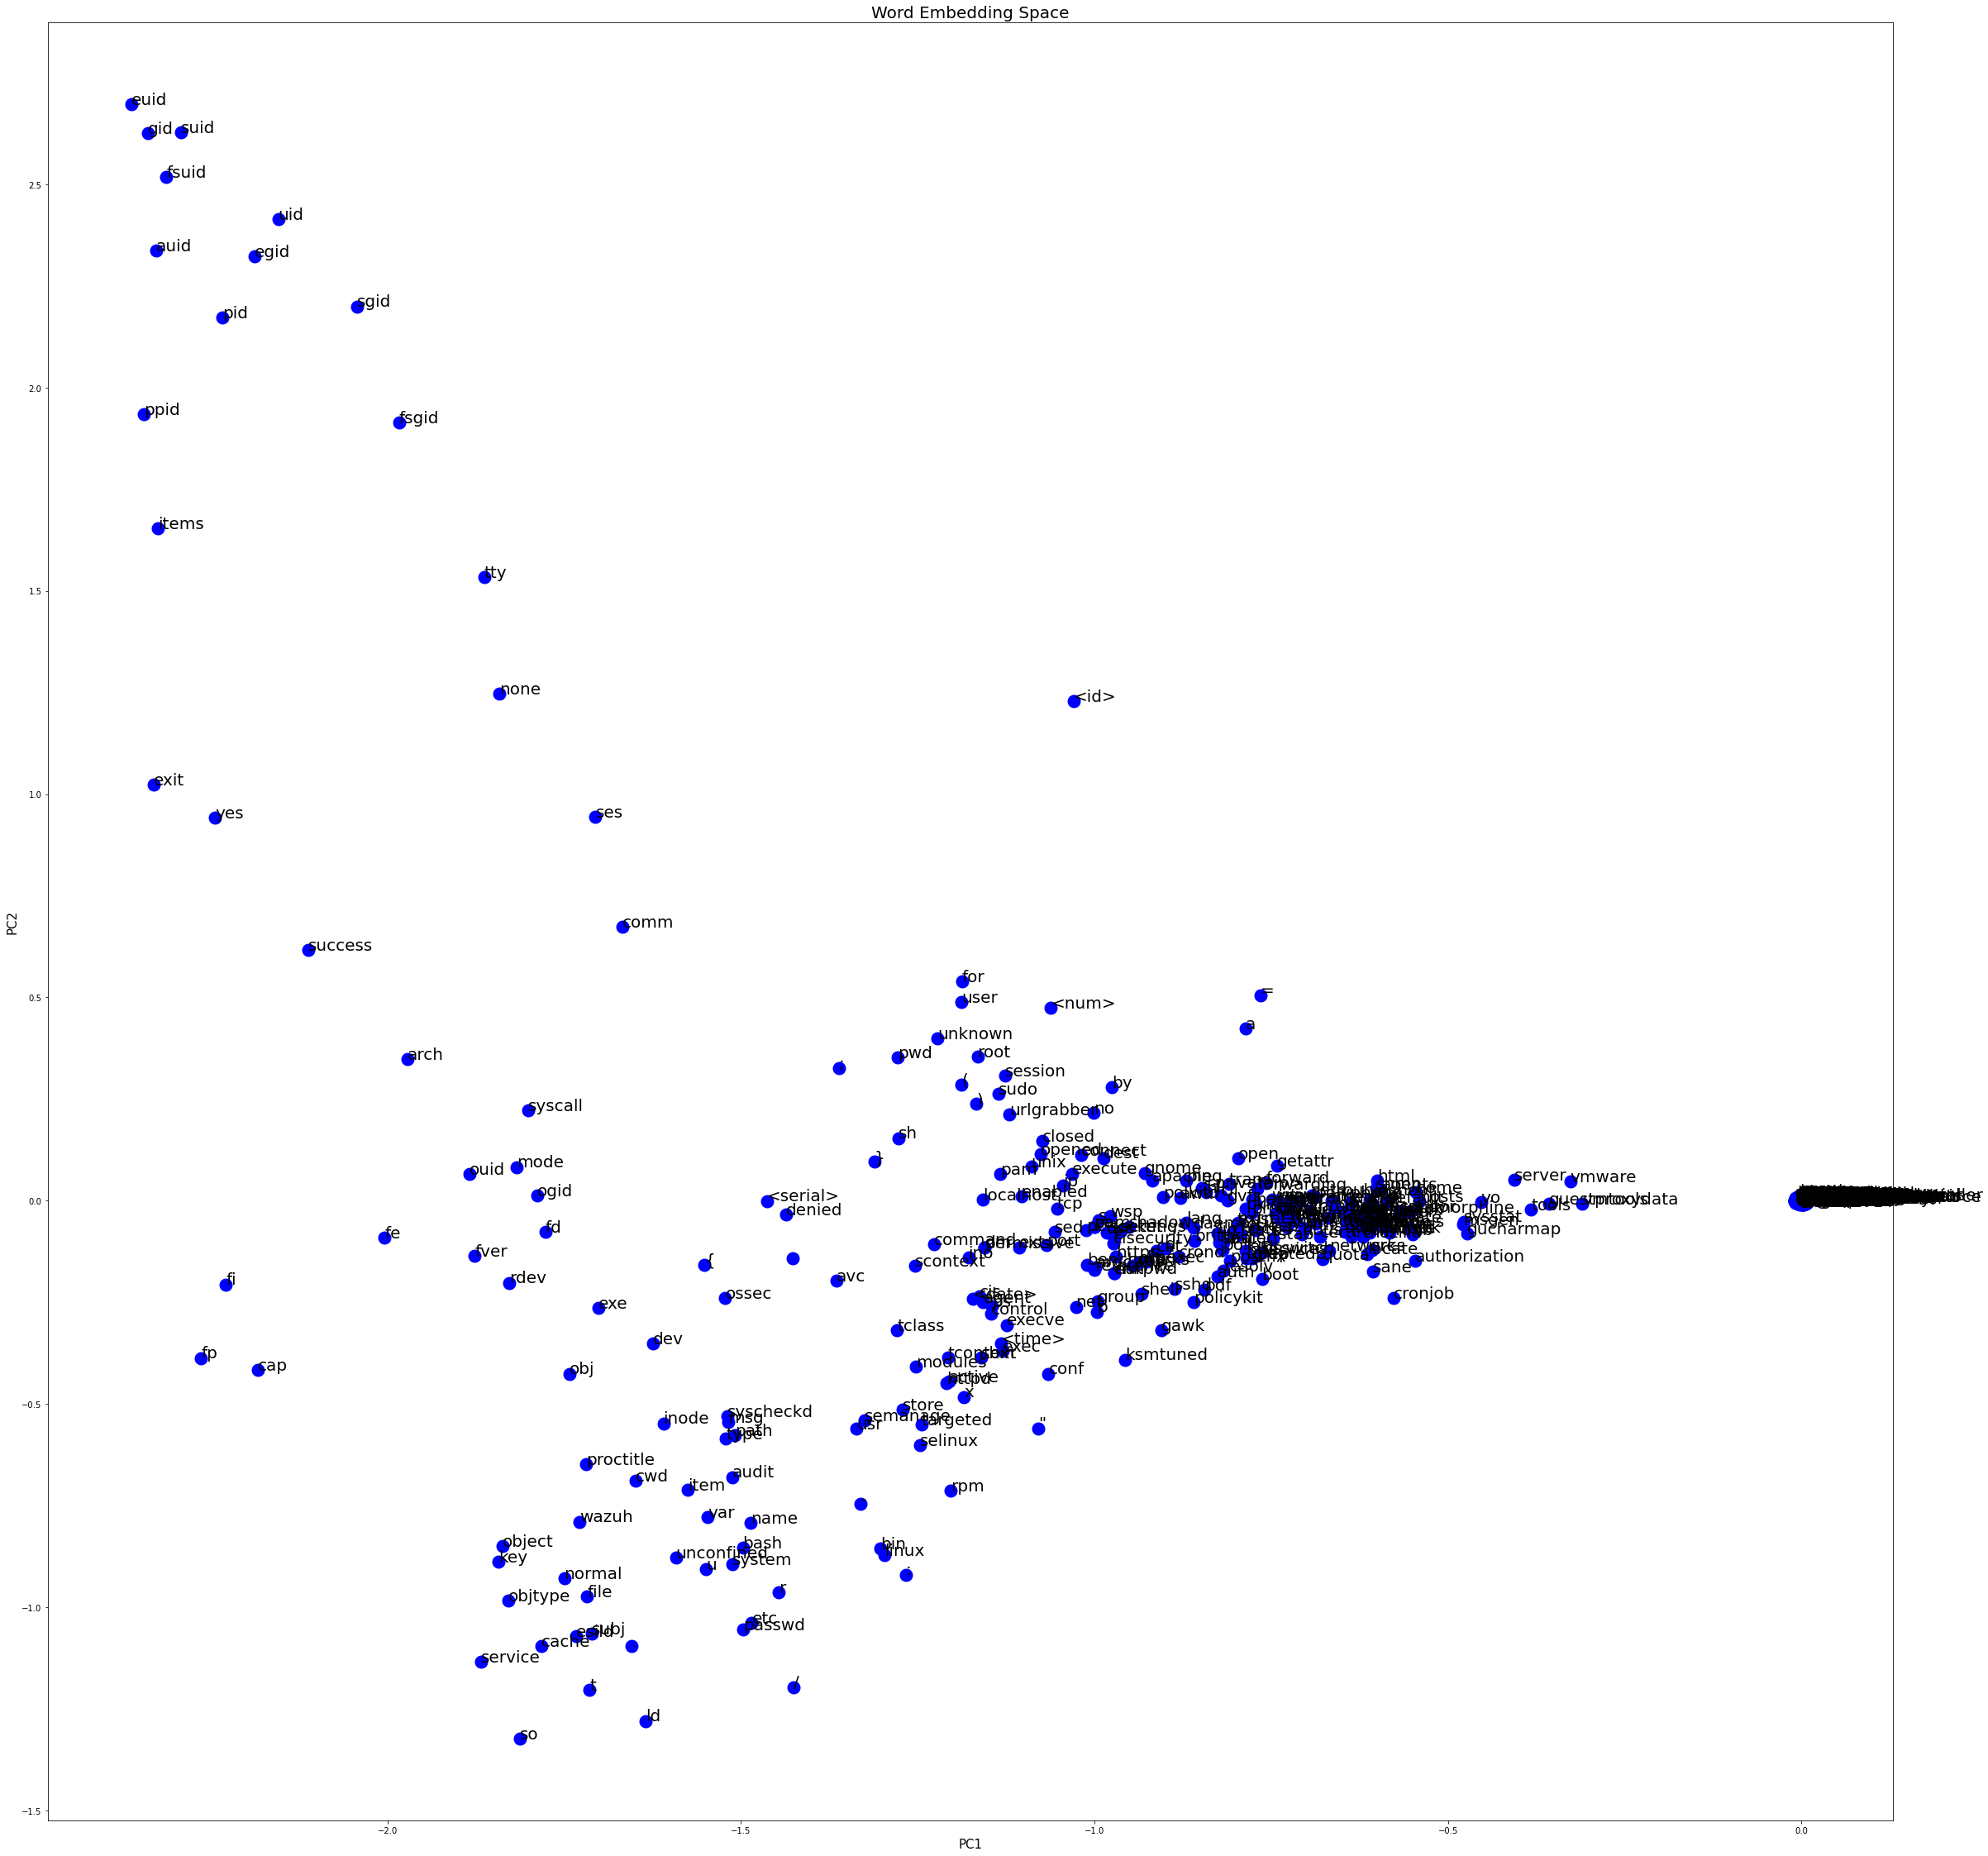

In [486]:
cleaned_tokens = []

token = df_one_sentences.log.loc[1].split(' ')
cleaned_tokens.append(token)
    
model = Word2Vec(cleaned_tokens, vector_size=200,
                          window=4, min_count=5,
                          workers=4, sg=1)


vocab = list(model.wv.key_to_index.keys())
X = model.wv[vocab]
df=pd.DataFrame(X, index=vocab)
print(df.shape)
df.head()

#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

plt.figure(figsize=(40,40))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab = model.wv
for word, i in model.wv.key_to_index.items():
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]), fontsize=20)
# plt.savefig('foo.png')